### Import Libraries

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style("whitegrid")
sns.set_palette("pastel")

In [3]:
df = pd.read_csv("../data/data.csv")
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [ ]:
# TODO : There is null values

In [12]:
df.describe()

,Comment,Sentiment
count,18364,18408
unique,17871,3
top,one of the best thing about dude is that he ne...,positive
freq,10,11432


In [16]:
df[df.duplicated()]

,Comment,Sentiment
173,from all the stuff mentioned i have the dji mi...,positive
518,happy independence day to ukraine and glory t...,negative
847,linus just turn the key lights 180 and bounce ...,positive
848,dan continues to be my new favorite he has suc...,positive
849,dan managing to set up his soldering station o...,positive
...,...,...
18145,explore our free courses with completion certi...,neutral
18283,thanks for this video very neatly calmly expla...,positive
18298,explore our free courses with completion certi...,neutral
18308,do you want to learn technology from me check ...,neutral


### Handling Null Values

In [23]:
print(df.columns[df.isna().sum() > 0].to_list())

['Comment']


In [22]:
null_counts = df.isnull().sum()
print(null_counts)

Comment      44
Sentiment     0
dtype: int64


In [27]:
# droping the rows as comment itself is null
df.dropna(subset=["Comment"], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18364 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18364 non-null  object
dtypes: object(2)
memory usage: 430.4+ KB


### Handling duplicates

In [ ]:
print(df.duplicated().sum())

490


In [35]:
df.drop_duplicates(keep="first", inplace=True)

In [36]:
print(df.duplicated().sum())

0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17874 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    17874 non-null  object
 1   Sentiment  17874 non-null  object
dtypes: object(2)
memory usage: 418.9+ KB


### EDA

In [38]:
df["Sentiment"].value_counts()

Sentiment
positive    11054
neutral      4503
negative     2317
Name: count, dtype: int64

In [ ]:
# TODO: Imbalanced target data

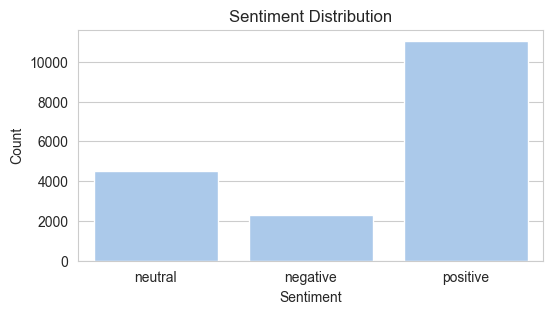

In [39]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x="Sentiment", data=df)
ax.set_title("Sentiment Distribution")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
plt.show()

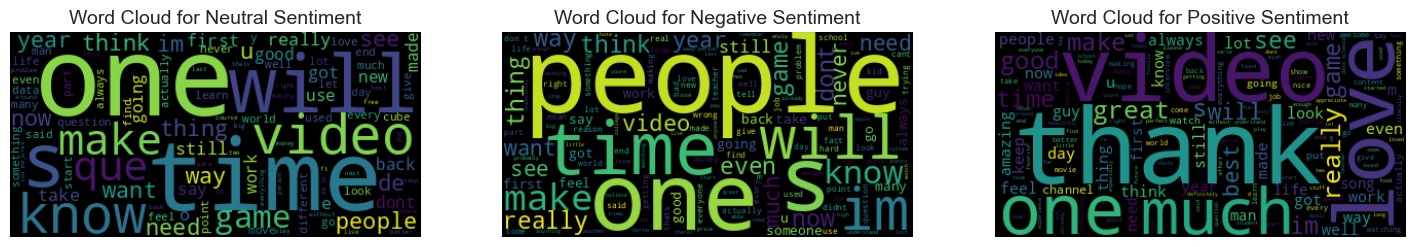

In [70]:

sentiments = df["Sentiment"].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

for i, sentiment in enumerate(sentiments): 
    text = " ".join(df[df["Sentiment"] == sentiment]["Comment"].astype(str))

    wordcloud = WordCloud(background_color="black").generate(text)
    
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f"Word Cloud for {sentiment.capitalize()} Sentiment", fontsize=14)
    axes[i].axis("off")

plt.show()

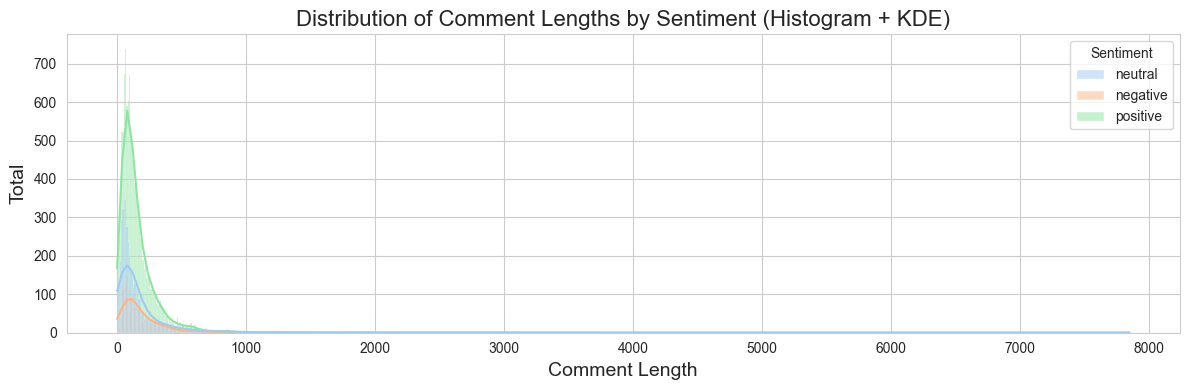

In [ ]:
df["length"] = df["Comment"].str.len()
plt.figure(figsize=(12, 4))

sns.histplot(data=df, x="length", hue="Sentiment", kde=True)

plt.title("Distribution of Comment Lengths", fontsize=16)
plt.xlabel("Comment Length", fontsize=14)
plt.ylabel("Total", fontsize=14)
plt.tight_layout()
plt.show()

In [96]:
df.groupby("Sentiment")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
negative,2317.0,210.874407,265.276426,4.0,79.0,134.0,250.0,3775.0
neutral,4503.0,195.100378,351.601598,2.0,58.0,98.0,194.0,7847.0
positive,11054.0,163.666546,192.739614,3.0,68.0,114.0,195.0,5487.0
